## Hands-on implementation of Gaussian Mixture Model in clustering

Our task is to perform clustering on the real-world datasets using Gaussian Mixture. For this, we are considering the IRIS flower dataset which holds the dimensional information of 3 different species of flower.

#### Read and load the data

As usual first we will load the data stored in a CSV file using pandas.

In [1]:
# Import pandas
import pandas as pd

# Read the data
data = pd.read_csv('Iris.csv')

Review the first 5 rows of the dataset.

In [2]:
# visualize the samples
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Let’s quickly check the shape of the data frame.

In [3]:
# check the shape of the data
data.shape

(150, 6)

#### Defining input features

From the above output, there are 6 columns out of which we need to use 4 columns named Sepal’s length & width and Petal’s length & width to create clusters. These four columns will be used as input to the Hierarchical algorithm.  

In [4]:
# Defining input (X) features
X = data.iloc[:,1:5].values
# size of X
X.shape

(150, 4)

As we can see we have successfully created the input features set.

#### Initializing and training the Gaussian mixture model

Before starting with modelling let’s take a look at data points distribution using a scatter plot.

Text(0, 0.5, 'Sepal Length')

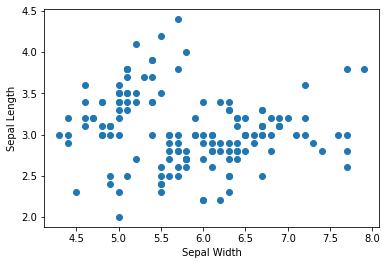

In [5]:
# check the distribution
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1])
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')

From the above plot, two clusters can be easily identified but there should be three clusters. Now, let's check whether GMM can catch all those clusters. Below we will import GMM from the sklearn library and will initialize it with 3 components.

In [6]:
# performing GMM
from sklearn.mixture import GaussianMixture
GMM = GaussianMixture(n_components=3)

Now we will train the model on input patterns. 

In [7]:
# train model
pred = GMM.fit_predict(X)

C:\Users\thaku\anaconda3\envs\deep-learning\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


#### Predicting and plotting clusters

The GMM can also give the probability of data points belonging to a cluster and this can be accessed by the .predict_proba method. 

In [8]:
# Evaluating the component density for each sample
GMM.predict_proba(X[:11,:])

array([[1.00000000e+00, 1.02611131e-43, 6.14801384e-35],
       [1.00000000e+00, 8.73156713e-31, 2.34417311e-28],
       [1.00000000e+00, 1.05971018e-35, 4.13839264e-30],
       [1.00000000e+00, 1.58901779e-31, 2.59053219e-26],
       [1.00000000e+00, 4.03725313e-46, 2.71282921e-35],
       [1.00000000e+00, 9.47551645e-45, 3.19896003e-35],
       [1.00000000e+00, 9.62354242e-36, 6.10196256e-29],
       [1.00000000e+00, 6.48099224e-40, 5.87734866e-32],
       [1.00000000e+00, 2.33396902e-27, 2.64588679e-24],
       [1.00000000e+00, 1.77676378e-35, 7.34400540e-29],
       [1.00000000e+00, 4.13614175e-49, 5.75423962e-38]])

Above we can see the probability for the first 10 data points and which belongs to clutter 0.

Now we will obtain the prediction on the complete dataset and will observe the labels that the algorithm has given.

In [9]:
# predicted result
data['labels'] = pred

# Cluster label
data['labels'].value_counts()

2    55
0    50
1    45
Name: labels, dtype: int64

As we can see in the above plot, the algorithm has successfully identified all three clusters which are labelled as 0,1,2.

Now finally we plot the clusters using a scatter plot.

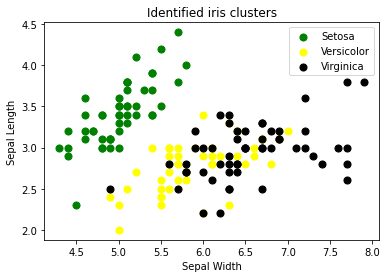

In [10]:
import matplotlib.pyplot as plt
# plotting the clusters
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], s = 50, c = 'green', label = 'Setosa')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], s = 50, c = 'yellow', label = 'Versicolor')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], s = 50, c = 'black', label = 'Virginica')
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')
plt.title('Identified iris clusters')
plt.legend()

The GMM has successfully separated the three clusters. The points belonging to Versicolor and Virginica are overlapping but GMM has successfully separated those clusters. 

So this is how we can address the clustering problem using the Gaussian mixture model. 